In [2]:
library(igraph)

# 1.1(d）

In [3]:
GCC_size<-function(c){
    p <- c()
    GCCs <- c()
    for (i in 1:9901){
        p[i] <- c/n[i]
        sum <- 0
        for (k in 1:100){
            g <- erdos.renyi.game(n[i], p[i], m=1, directed=F)
            g.components <- clusters(g)
            GCC <- max(g.components$csize)
            sum <- GCC + sum
        }
        GCCs[i] <- sum/100
    }
    GCCs
}

GCC_analyze<-function(GCCs){
    GCC.bins <- c()
    for(i in 1:100){
        GCC.bins = c(GCC.bins, (mean(GCCs[((i-1)*100+1):(i*100)])))
    }
    n.bins <- 1:length(GCC.bins)
    plot(n.bins, GCC.bins, main='The median of GCC sizes for n bins', xlab='Median of GCC size',
         ylab='The number of nodes n')
}

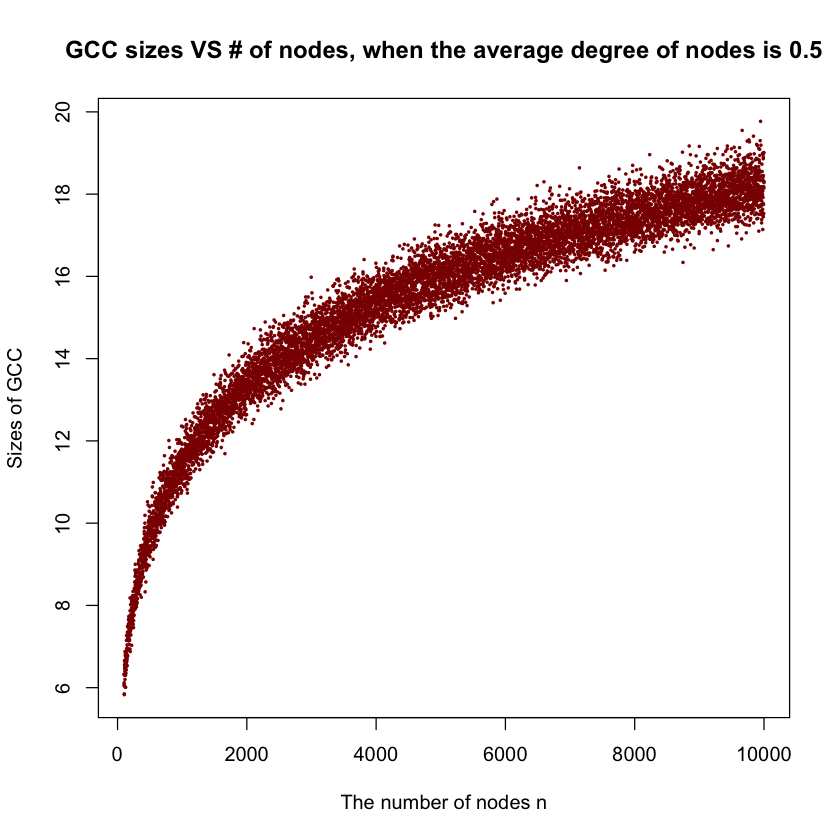

In [4]:
n <- c(100:10000)
GCCs0.5 <- GCC_size(c=0.5)
plot(n, GCCs0.5,'p', cex = .4, col = "dark red",
     main = "GCC sizes VS # of nodes, when the average degree of nodes is 0.5",
     xlab = "The number of nodes n",ylab = "Sizes of GCC", pch = 16)

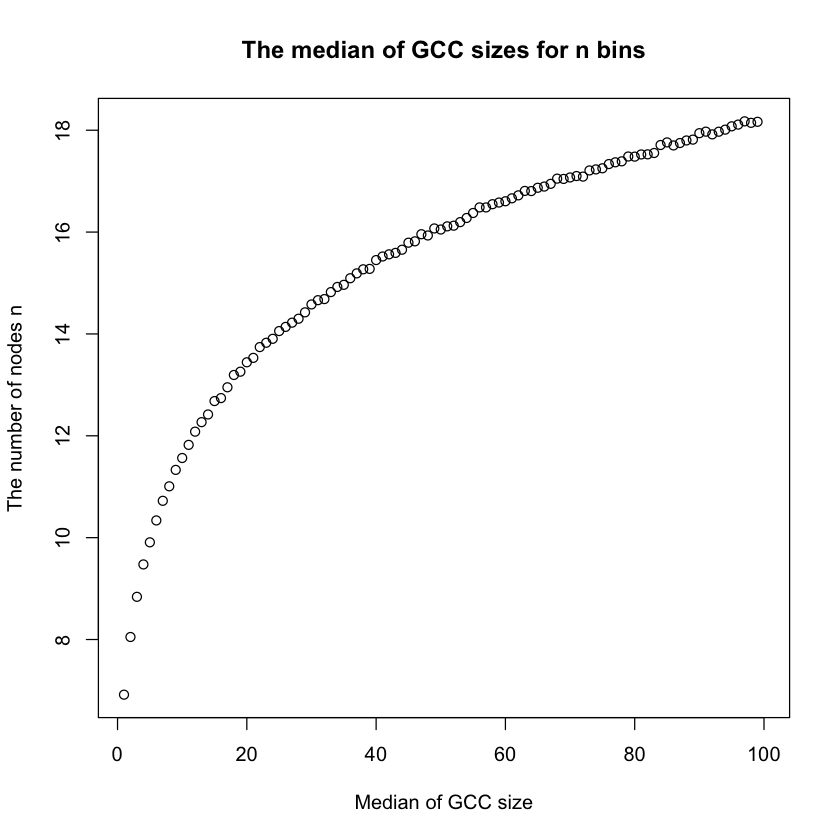

In [5]:
GCC_analyze(GCCs0.5)

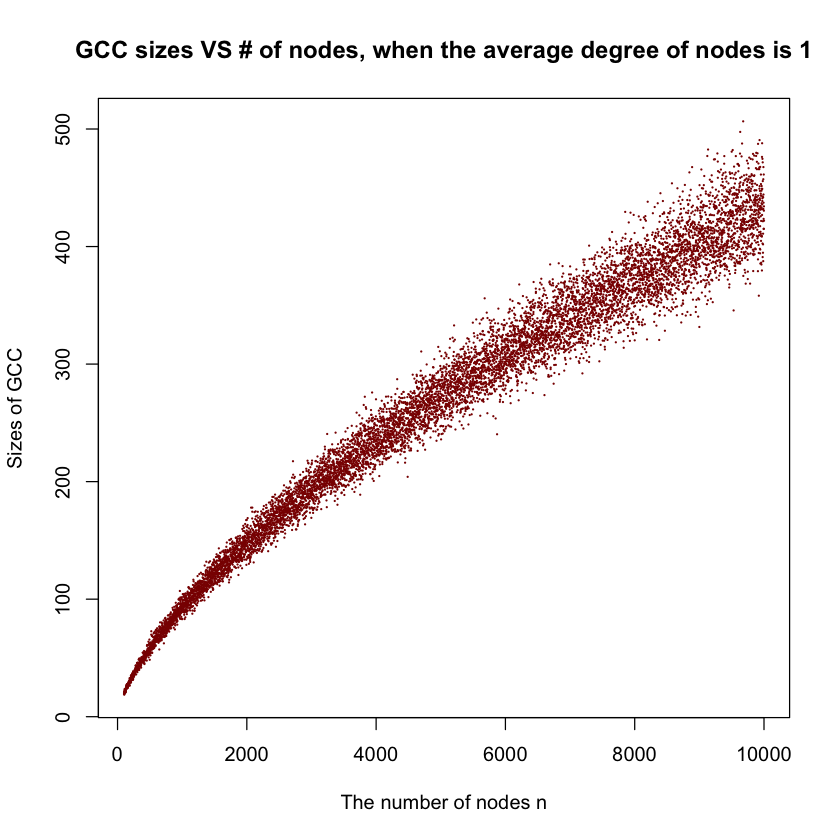

In [6]:
n <- c(100:10000)
GCCs1 <- GCC_size(c=1)
plot(n, GCCs1,'p', cex = .25, col = "dark red",
     main = "GCC sizes VS # of nodes, when the average degree of nodes is 1",
     xlab = "The number of nodes n",ylab = "Sizes of GCC", pch = 16)

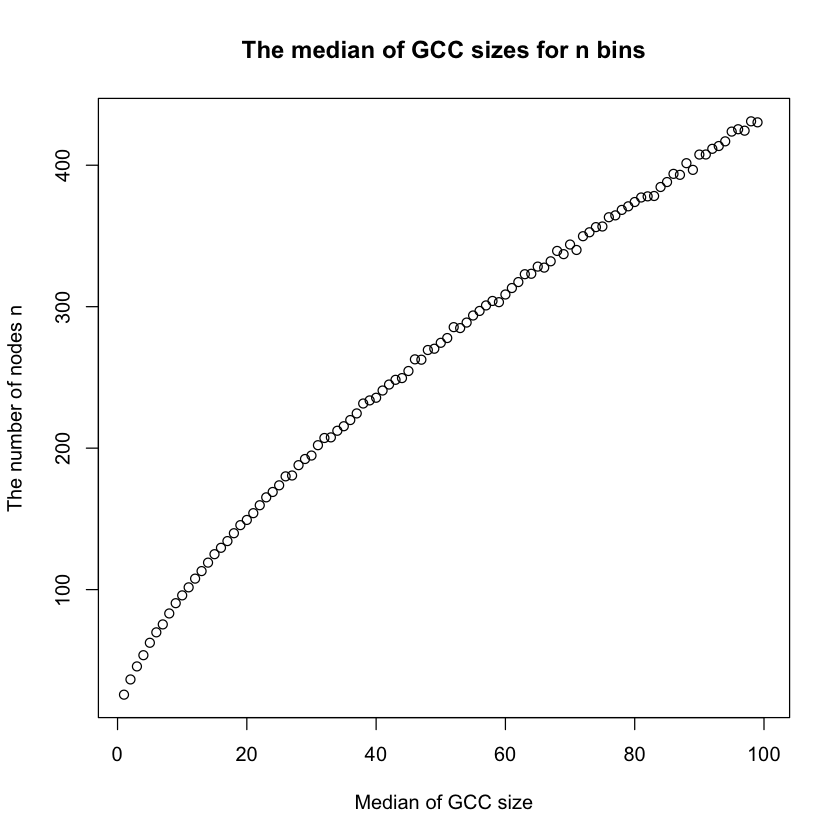

In [7]:
GCC_analyze(GCCs1)

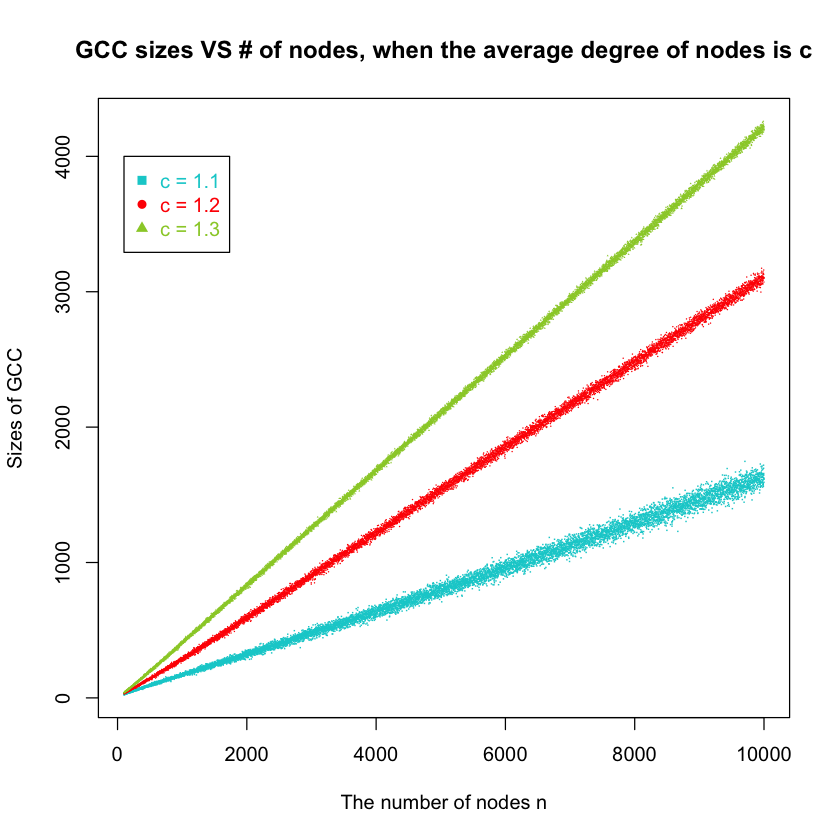

In [8]:
n <- c(100:10000)
GCCs1.1 <- GCC_size(c=1.1)
GCCs1.2 <- GCC_size(c=1.2)
GCCs1.3 <- GCC_size(c=1.3)

plot(n, GCCs1.1, 'p', cex = .16, col = 'DarkTurquoise',
     main = "GCC sizes VS # of nodes, when the average degree of nodes is c",
     xlab = "The number of nodes n",ylab = "Sizes of GCC", pch = 15,
     ylim = c(min(GCCs1.1,GCCs1.2,GCCs1.3),max(GCCs1.3)))
lines(n, GCCs1.2, cex = .16, 'p', col = 'Red', pch = 16)
lines(n, GCCs1.3, cex = .16, 'p', col = 'Yellowgreen', pch = 17)
legend(100,4000,c("c = 1.1","c = 1.2","c = 1.3"),col=c("DarkTurquoise","Red","Yellowgreen"),
       text.col=c("DarkTurquoise","Red","Yellowgreen"),pch=c(15,16,17))


# 1.2(d)

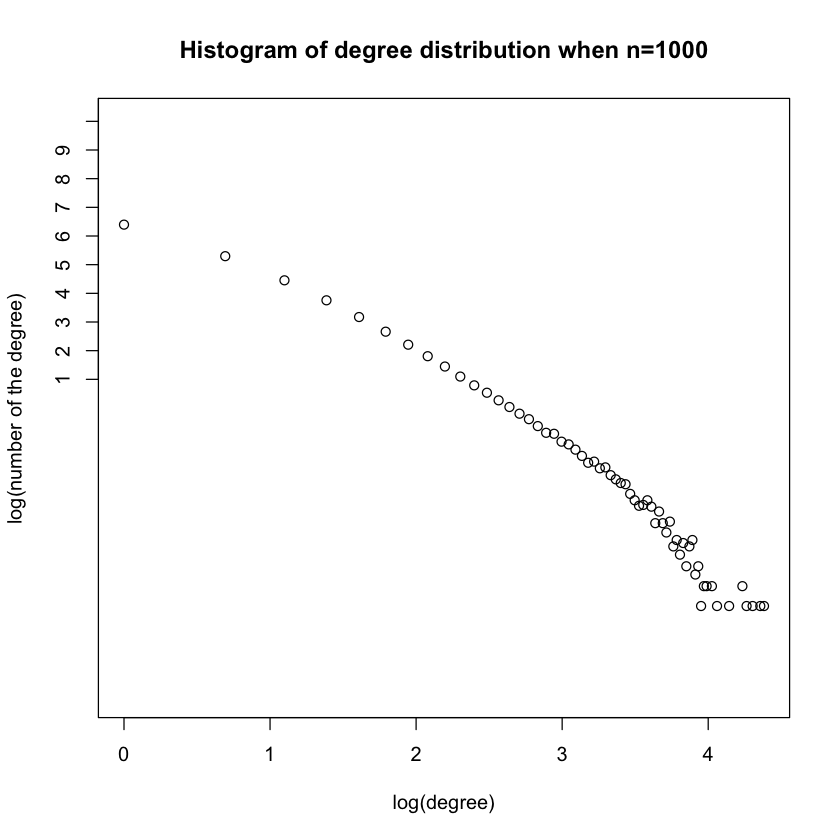

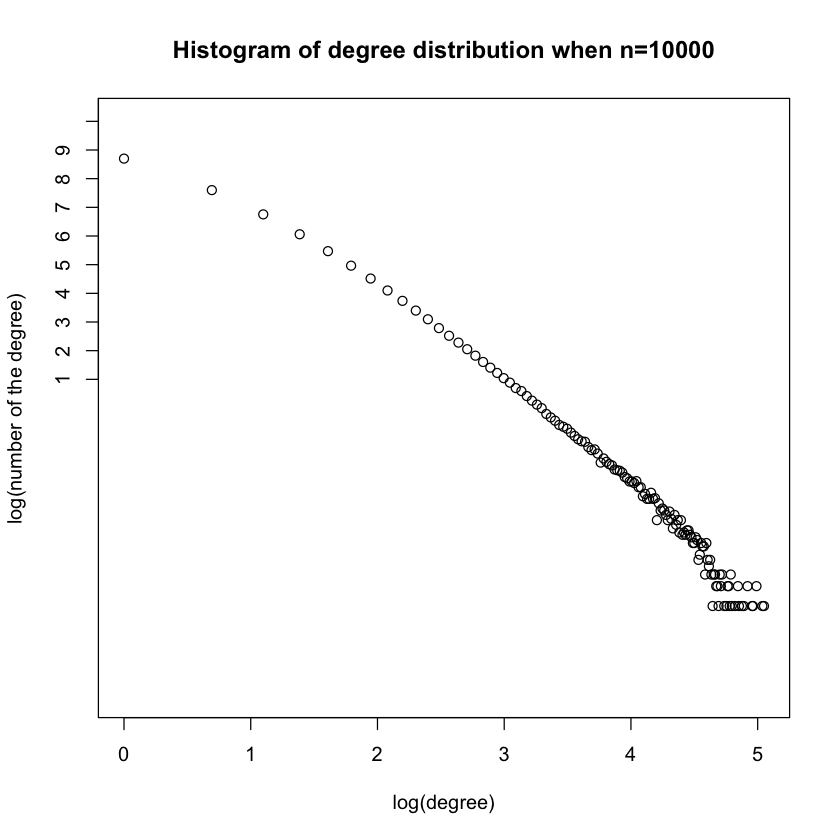

In [83]:
degree_list_1000 <- c()
degree_list_10000 <- c()
for (k in 1:1000){
    g1000 <- sample_pa(n=1000, power = 1, m = 1, directed = FALSE)
    degree_list_1000 <- c(degree_list_1000,degree(g1000))
    g10000 <- sample_pa(n=10000, power = 1, m = 1, directed = FALSE)
    degree_list_10000 <- c(degree_list_10000,degree(g10000))
}
count_1000 <- table(degree_list_1000)
count_10000 <- table(degree_list_10000)

plot(log(as.numeric(names(count_1000))), log(count_1000[names(count_1000)]/k),
     main='Histogram of degree distribution when n=1000', xlab='log(degree)',
     ylab='log(number of the degree)',ylim=c(-10,10))
plot(log(as.numeric(names(count_10000))), log(count_10000[names(count_10000)]/k),
     main='Histogram of degree distribution when n=10000', xlab='log(degree)',
     ylab='log(number of the degree)',ylim=c(-10,10))


# 1.2(e)

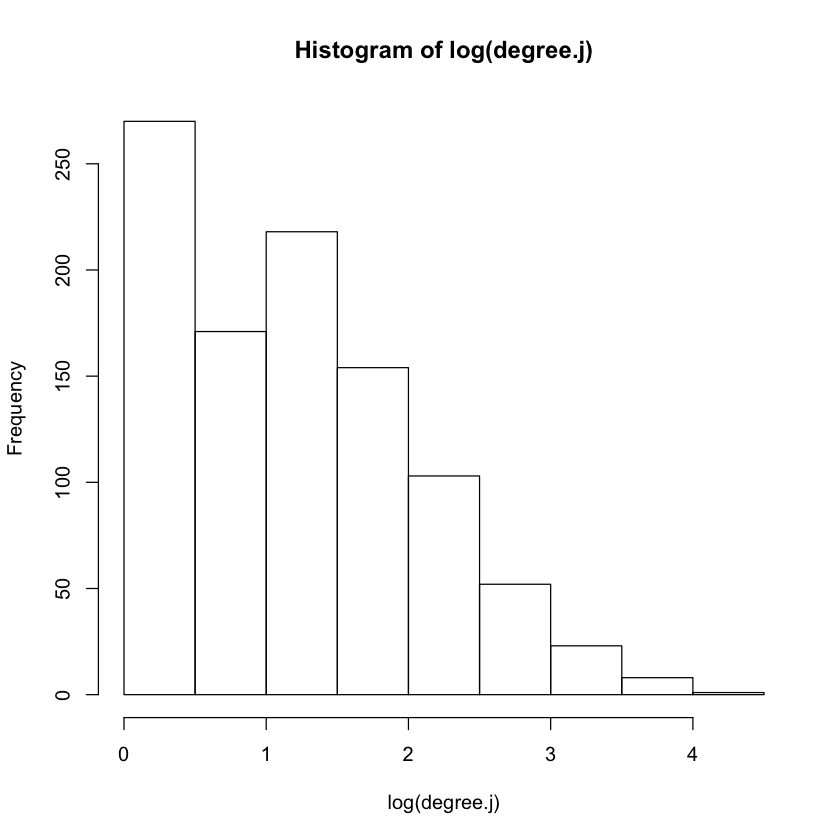

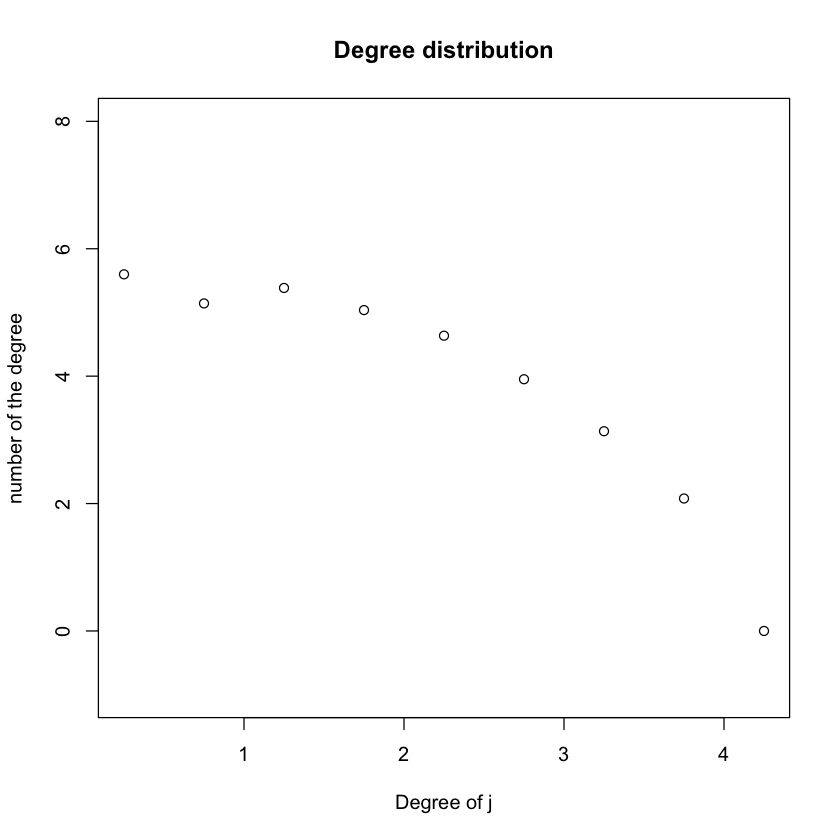

In [73]:
degree.j <- c()
for (time in 1:1000){
    g1000 <- sample_pa(n=1000, m = 1, directed = FALSE)
    i <- sample(1:1000, 1)
    a <- ego(g1000,order=1,nodes=V(g1000)[i])
    j <- sample(a[[1]][2:length(a[[1]])], 1)
    degree.j[time] <- degree(g1000)[j]
}
degree_count <- hist(log(degree.j))
plot(degree_count$mid, log(degree_count$counts),main='Degree distribution',
     xlab='Degree of j', ylab='number of the degree',ylim=c(-1,8))

# 1.2(f)

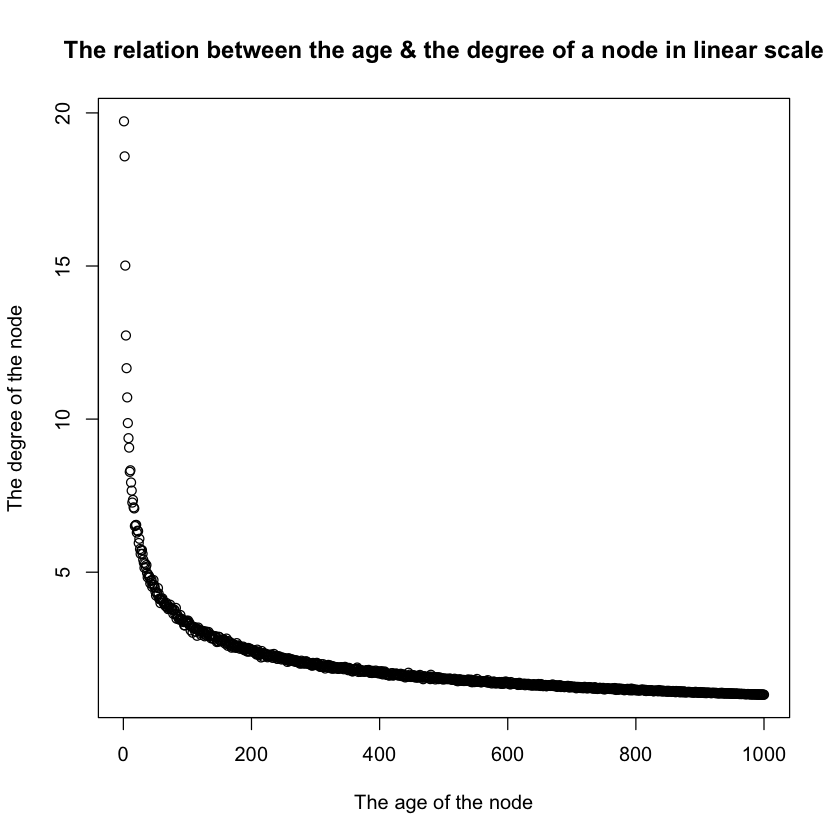

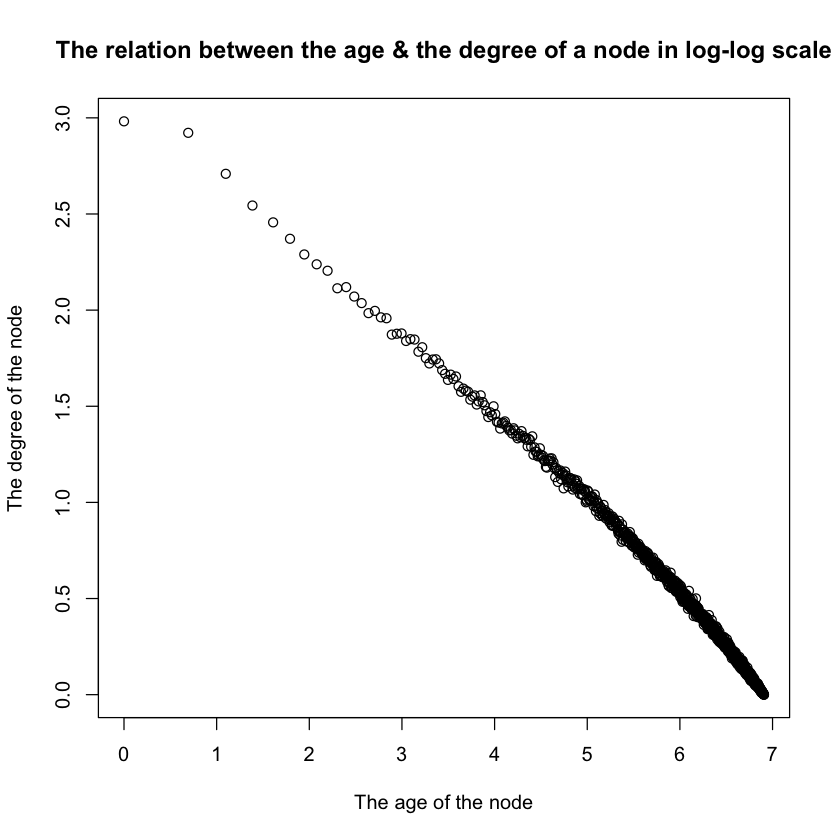

In [12]:
sum.degree <- 0
for (time in 1:1000){
    g1000 <- sample_pa(n=1000, m = 1, directed = FALSE)
    sum.degree <- degree(g1000)+sum.degree
}
degree1000 <- sum.degree/time
plot(V(g1000),degree1000,main='The relation between the age & the degree of a node in linear scale',
     xlab='The age of the node',ylab='The degree of the node')
plot(log(V(g1000)),log(degree1000),main='The relation between the age & the degree of a node in log-log scale',
     xlab='The age of the node',ylab='The degree of the node')

# 1.2(g)

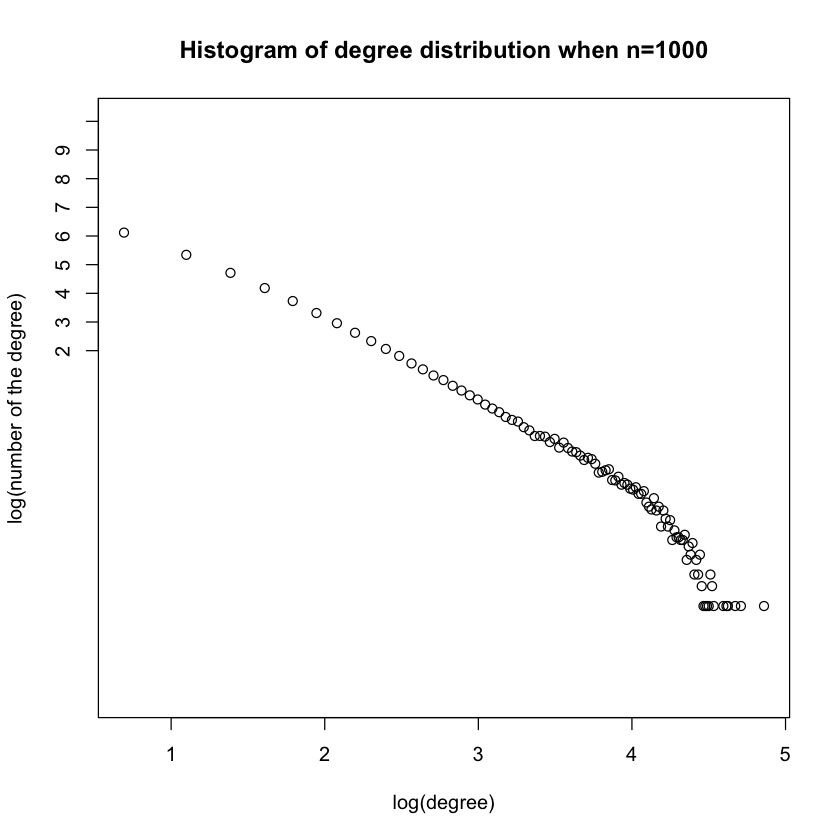

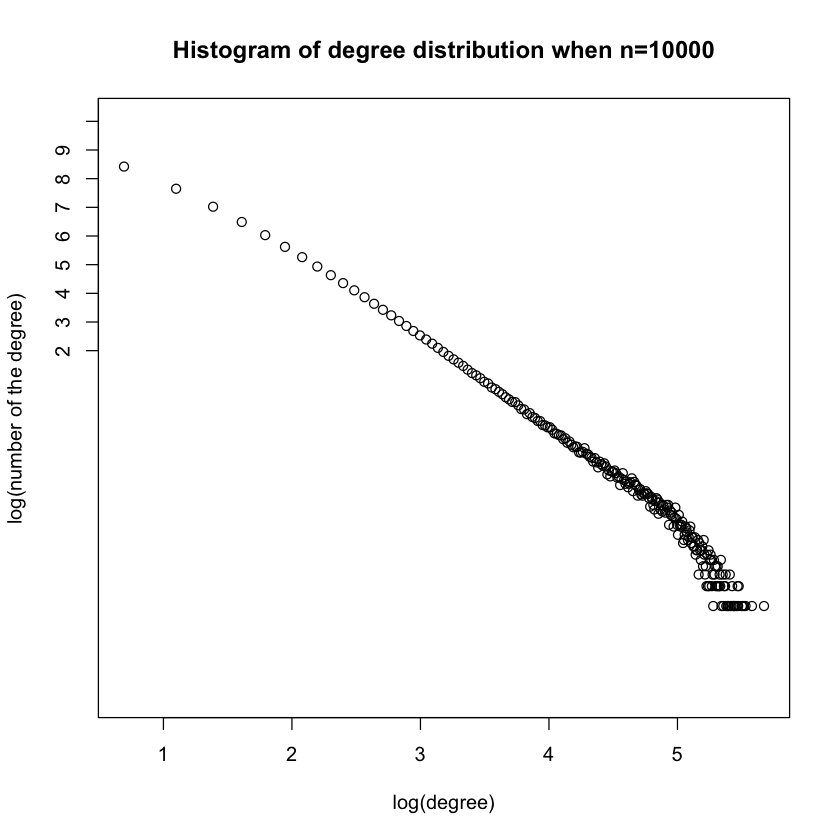

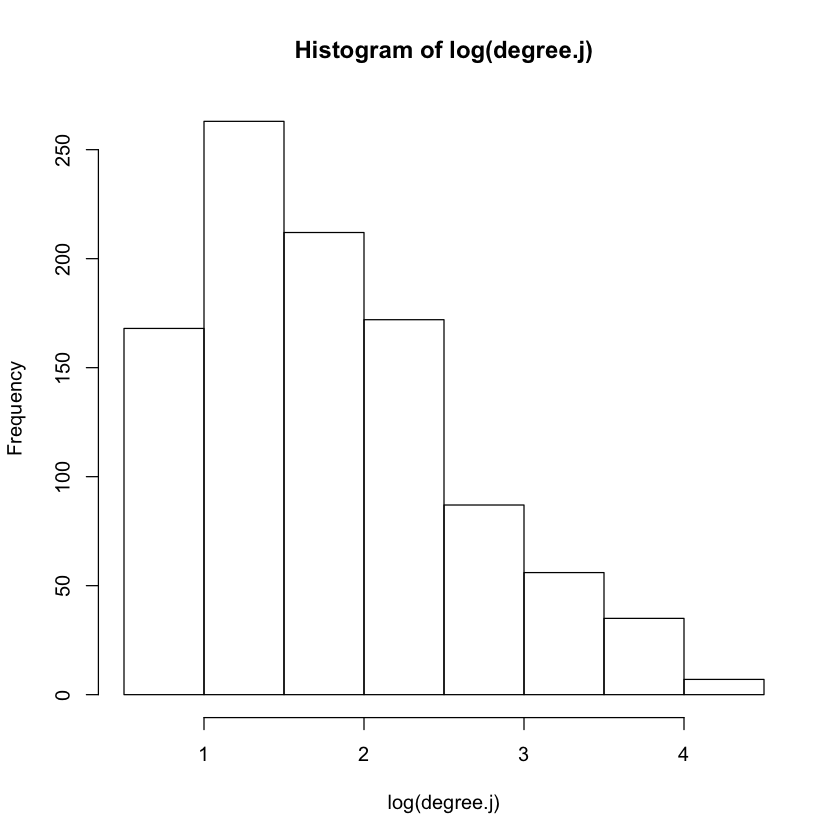

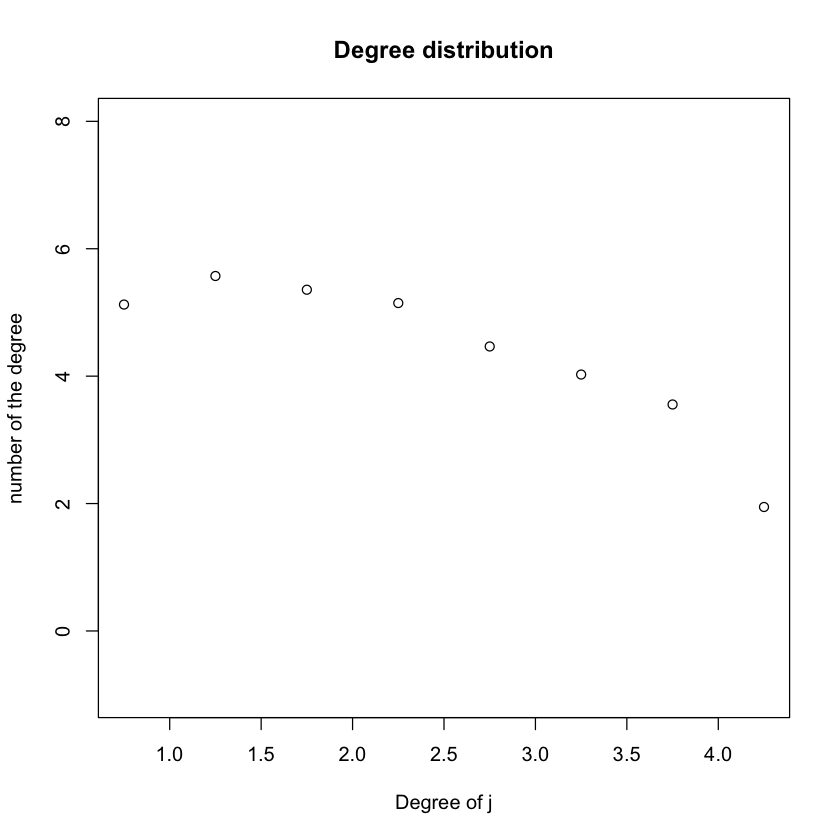

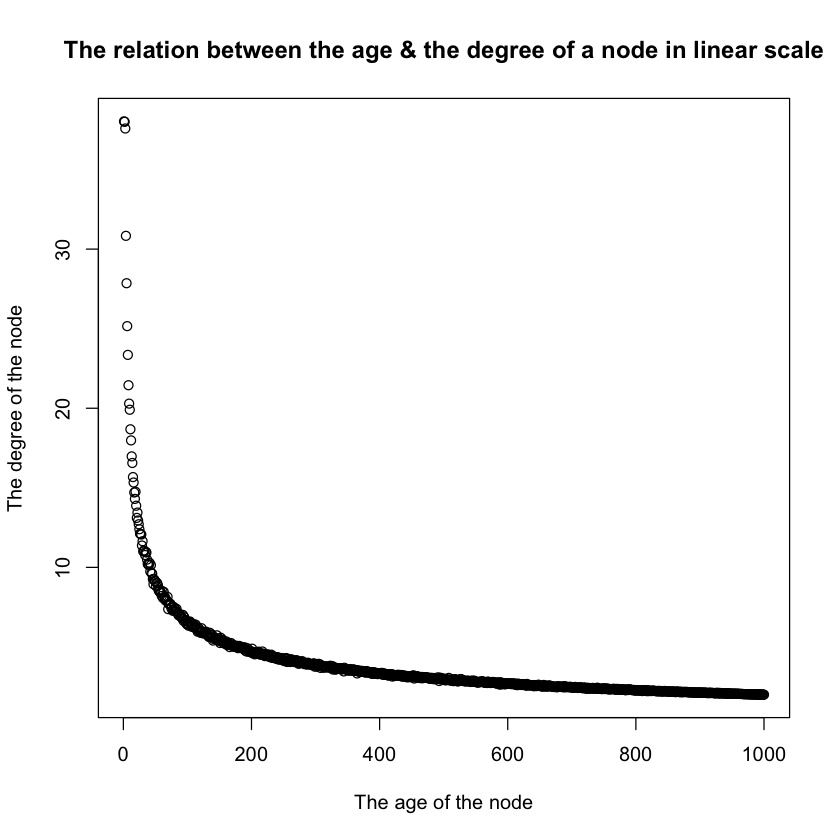

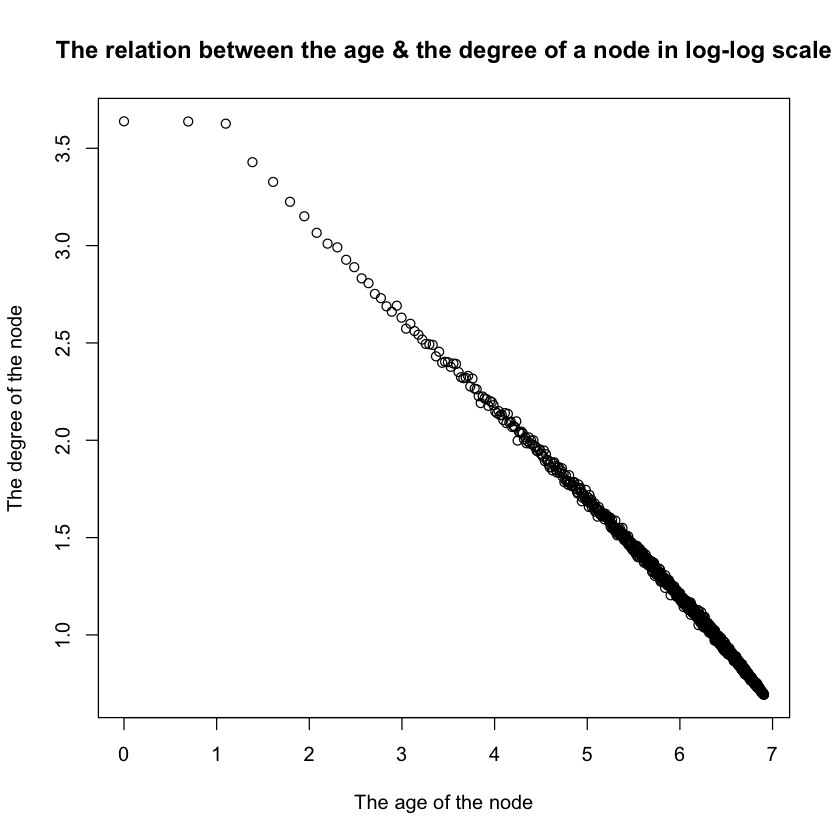

In [94]:
# m = 2
degree_list_1000 <- c()
degree_list_10000 <- c()
for (k in 1:1000){
    g1000 <- sample_pa(n=1000, power = 1, m = 2, directed = FALSE)
    degree_list_1000 <- c(degree_list_1000,degree(g1000))
    g10000 <- sample_pa(n=10000, power = 1, m = 2, directed = FALSE)
    degree_list_10000 <- c(degree_list_10000,degree(g10000))
}
count_1000 <- table(degree_list_1000)
count_10000 <- table(degree_list_10000)

plot(log(as.numeric(names(count_1000))), log(count_1000[names(count_1000)]/k),
     main='Histogram of degree distribution when n=1000', xlab='log(degree)',
     ylab='log(number of the degree)',ylim=c(-10,10))
plot(log(as.numeric(names(count_10000))), log(count_10000[names(count_10000)]/k),
     main='Histogram of degree distribution when n=10000', xlab='log(degree)',
     ylab='log(number of the degree)',ylim=c(-10,10))
# print(log(as.numeric(names(count_1000))))
# print(log(count_1000[names(count_1000)]/k))
# print(log(as.numeric(names(count_10000))))
# print(log(count_10000[names(count_10000)]/k))


degree.j <- c()
for (time in 1:1000){
    g1000 <- sample_pa(n=1000, m = 2, directed = FALSE)
    i <- sample(1:1000, 1)
    a <- ego(g1000,order=1,nodes=V(g1000)[i])
    j <- sample(a[[1]][2:length(a[[1]])], 1)
    degree.j[time] <- degree(g1000)[j]
}
degree_count <- hist(log(degree.j))
plot(degree_count$mid, log(degree_count$counts),main='Degree distribution',
     xlab='Degree of j', ylab='number of the degree',ylim=c(-1,8))



sum.degree <- 0
for (time in 1:1000){
    g1000 <- sample_pa(n=1000, m = 2, directed = FALSE)
    sum.degree <- degree(g1000)+sum.degree
}
degree1000 <- sum.degree/time
plot(V(g1000),degree1000,main='The relation between the age & the degree of a node in linear scale',
     xlab='The age of the node',ylab='The degree of the node')
plot(log(V(g1000)),log(degree1000),main='The relation between the age & the degree of a node in log-log scale',
     xlab='The age of the node',ylab='The degree of the node')


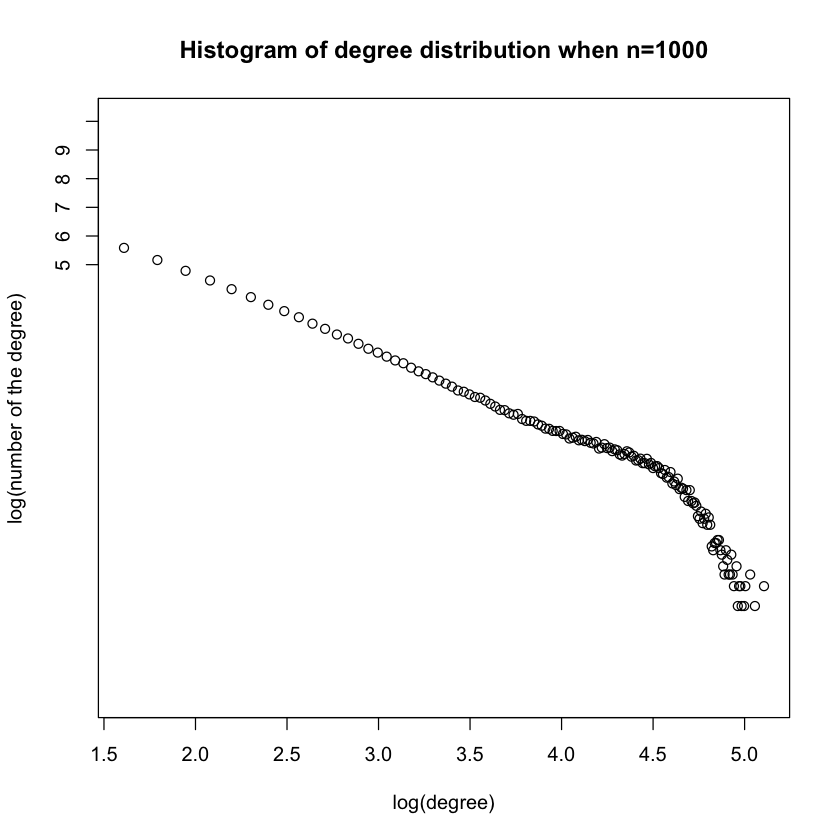

  [1] 1.609438 1.791759 1.945910 2.079442 2.197225 2.302585 2.397895 2.484907
  [9] 2.564949 2.639057 2.708050 2.772589 2.833213 2.890372 2.944439 2.995732
 [17] 3.044522 3.091042 3.135494 3.178054 3.218876 3.258097 3.295837 3.332205
 [25] 3.367296 3.401197 3.433987 3.465736 3.496508 3.526361 3.555348 3.583519
 [33] 3.610918 3.637586 3.663562 3.688879 3.713572 3.737670 3.761200 3.784190
 [41] 3.806662 3.828641 3.850148 3.871201 3.891820 3.912023 3.931826 3.951244
 [49] 3.970292 3.988984 4.007333 4.025352 4.043051 4.060443 4.077537 4.094345
 [57] 4.110874 4.127134 4.143135 4.158883 4.174387 4.189655 4.204693 4.219508
 [65] 4.234107 4.248495 4.262680 4.276666 4.290459 4.304065 4.317488 4.330733
 [73] 4.343805 4.356709 4.369448 4.382027 4.394449 4.406719 4.418841 4.430817
 [81] 4.442651 4.454347 4.465908 4.477337 4.488636 4.499810 4.510860 4.521789
 [89] 4.532599 4.543295 4.553877 4.564348 4.574711 4.584967 4.595120 4.605170
 [97] 4.615121 4.624973 4.634729 4.644391 4.653960 4.663439 4.67

degree_list_10000
           5            6            7            8            9           10 
 7.893930964  7.467044156  7.091003073  6.753759920  6.450272930  6.171556537 
          11           12           13           14           15           16 
 5.914478206  5.678351840  5.461995374  5.253963099  5.061917588  4.877568555 
          17           18           19           20           21           22 
 4.705974337  4.540887632  4.393053119  4.244071185  4.095344063  3.960413090 
          23           24           25           26           27           28 
 3.830487517  3.704826619  3.584046577  3.466516848  3.361867329  3.242084410 
          29           30           31           32           33           34 
 3.142124362  3.034568297  2.942700627  2.841939863  2.760073229  2.662145869 
          35           36           37           38           39           40 
 2.581125508  2.511305124  2.413858095  2.326496913  2.255598302  2.177248602 
          41           42         

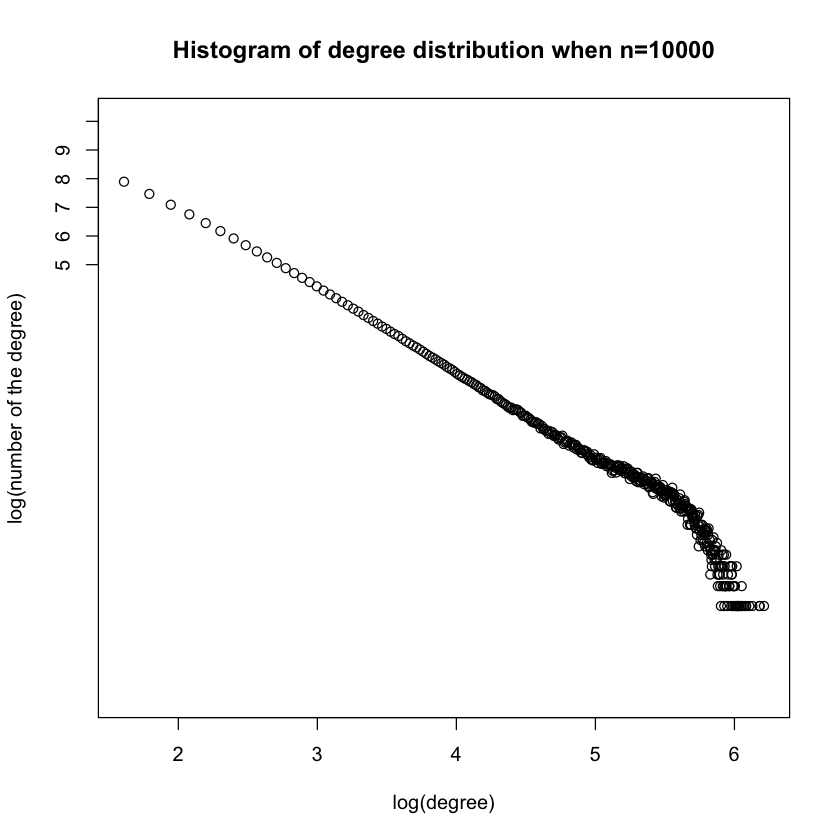

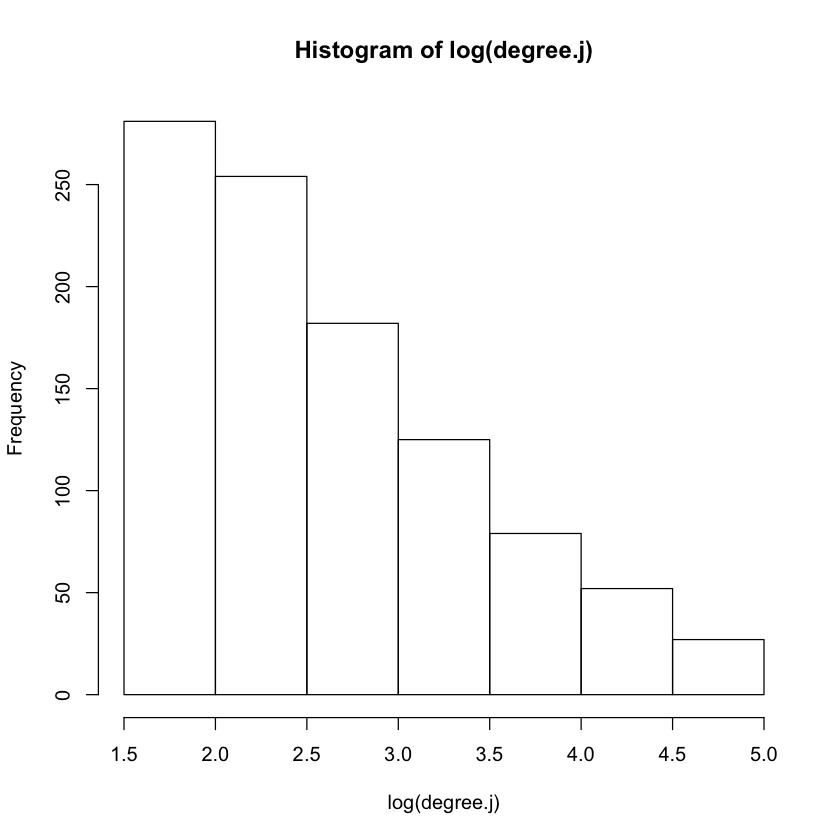

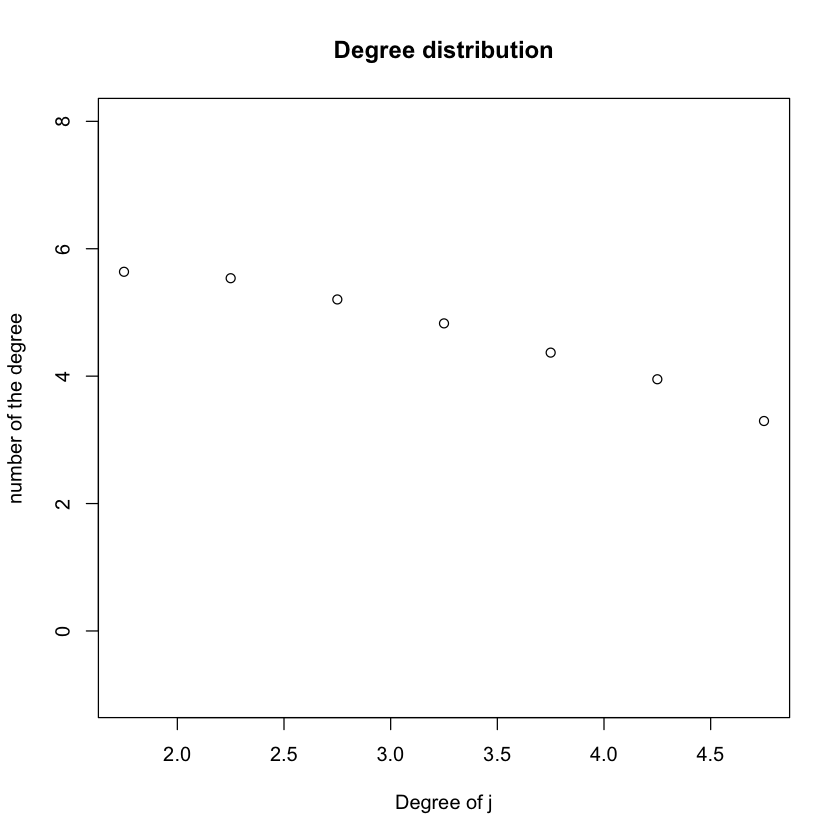

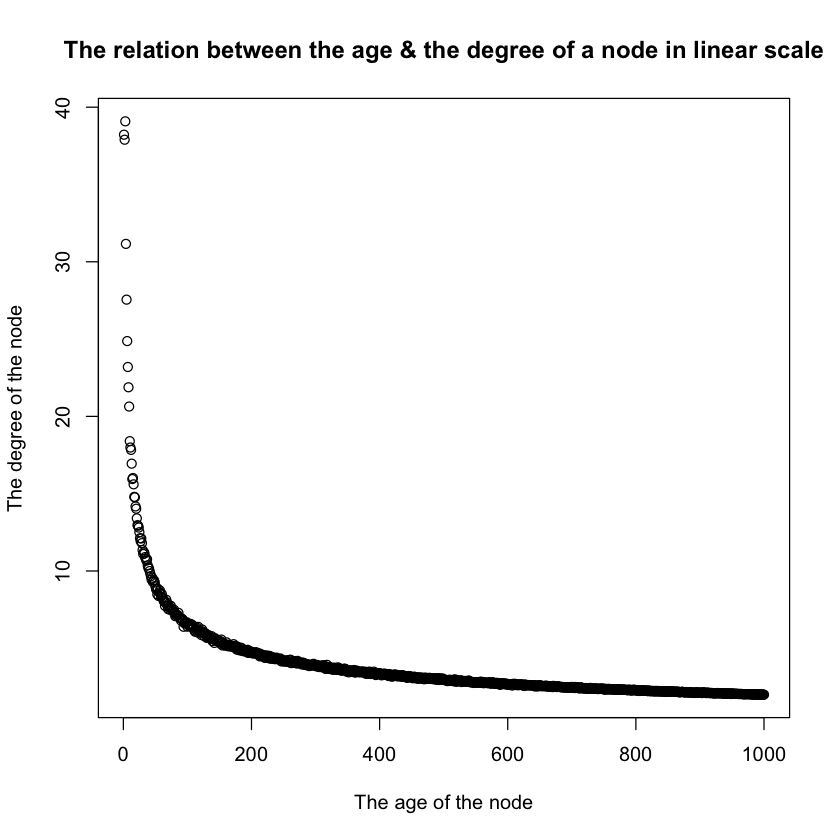

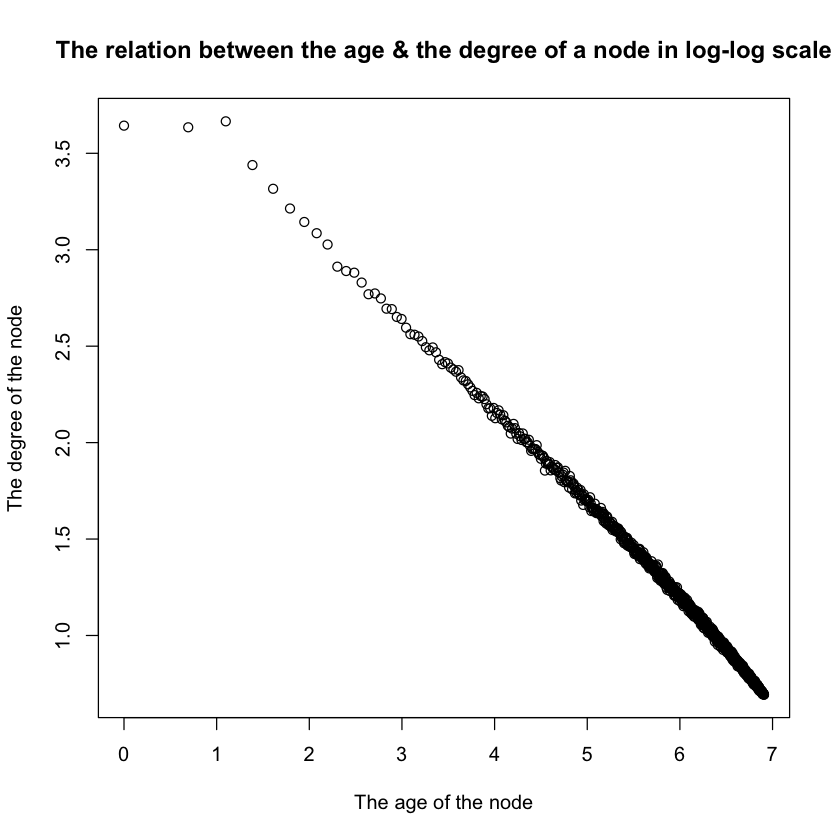

In [93]:
# m = 5
degree_list_1000 <- c()
degree_list_10000 <- c()
for (k in 1:1000){
    g1000 <- sample_pa(n=1000, power = 1, m = 5, directed = FALSE)
    degree_list_1000 <- c(degree_list_1000,degree(g1000))
    g10000 <- sample_pa(n=10000, power = 1, m = 5, directed = FALSE)
    degree_list_10000 <- c(degree_list_10000,degree(g10000))
}
count_1000 <- table(degree_list_1000)
count_10000 <- table(degree_list_10000)

plot(log(as.numeric(names(count_1000))), log(count_1000[names(count_1000)]/k),
     main='Histogram of degree distribution when n=1000', xlab='log(degree)',
     ylab='log(number of the degree)',ylim=c(-10,10))
plot(log(as.numeric(names(count_10000))), log(count_10000[names(count_10000)]/k),
     main='Histogram of degree distribution when n=10000', xlab='log(degree)',
     ylab='log(number of the degree)',ylim=c(-10,10))

print(log(as.numeric(names(count_1000))))
print(log(count_1000[names(count_1000)]/k))
print(log(as.numeric(names(count_10000))))
print(log(count_10000[names(count_10000)]/k))


degree.j <- c()
for (time in 1:1000){
    g1000 <- sample_pa(n=1000, m = 5, directed = FALSE)
    i <- sample(1:1000, 1)
    a <- ego(g1000,order=1,nodes=V(g1000)[i])
    j <- sample(a[[1]][2:length(a[[1]])], 1)
    degree.j[time] <- degree(g1000)[j]
}
degree_count <- hist(log(degree.j))
plot(degree_count$mid, log(degree_count$counts),main='Degree distribution',
     xlab='Degree of j', ylab='number of the degree',ylim=c(-1,8))

sum10000 <- 0
for (time in 1:1000){
    g1000 <- sample_pa(n=1000, m = 5, directed = FALSE)
    sum10000 <- degree(g10000) + sum10000
}
degree1000 <- sum.degree/time
plot(V(g1000),degree1000,main='The relation between the age & the degree of a node in linear scale',
     xlab='The age of the node',ylab='The degree of the node')
plot(log(V(g1000)),log(degree1000),main='The relation between the age & the degree of a node in log-log scale',
     xlab='The age of the node',ylab='The degree of the node')


# 1.2(h)

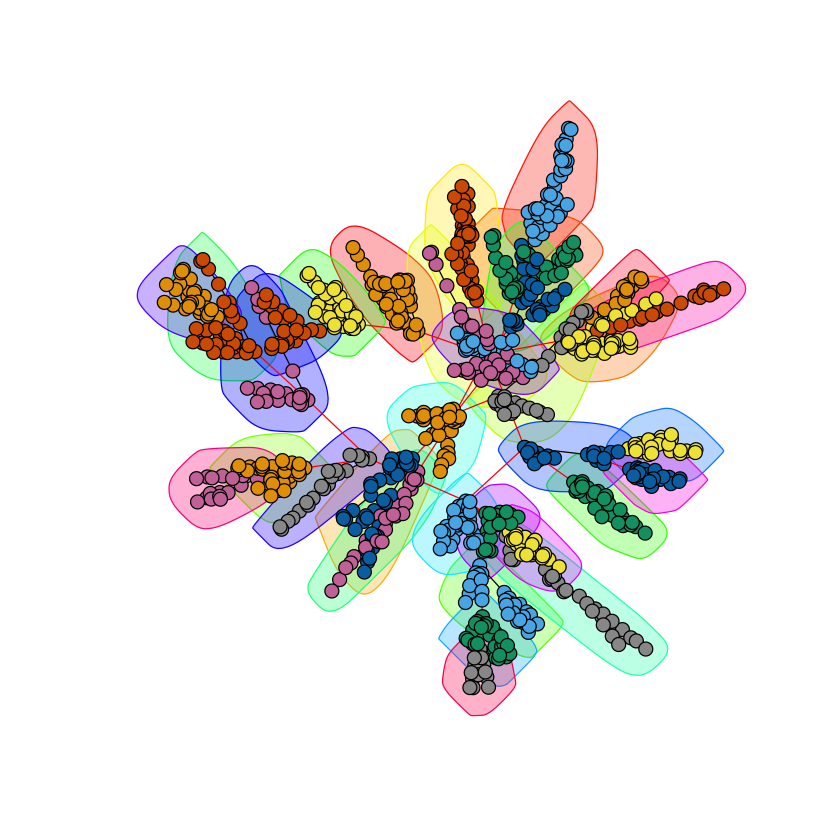

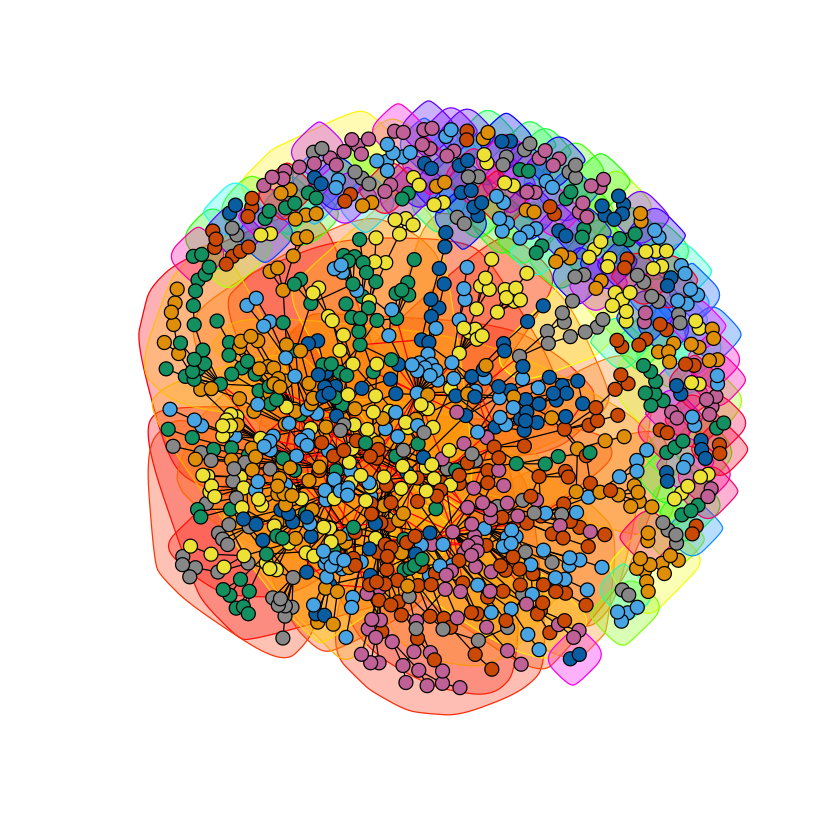

In [22]:
#create graphs
g.h <- barabasi.game(1000,m=1, directed=F)
degree.sequence <- degree(g.h, mode="all")
g.sequence <- sample_degseq(degree.sequence, method="simple.no.multiple")
set.seed(23)
g.h.commu <- fastgreedy.community(g.h)
g.sequence.commu <- fastgreedy.community(g.sequence)

# Plot
plott <-function(g, wc){
layout <-layout.fruchterman.reingold(g)
plot(wc, g, layout=layout, vertex.label=NA, vertex.size=5,  edge.arrow.size=.2)
}

plott(g.h, g.h.commu)
plott(g.sequence, g.sequence.commu)

In [23]:
modularity(g.h.commu)
modularity(g.sequence.commu)

[1] 0.9350457

[1] 0.8463839

# 1.3(a)

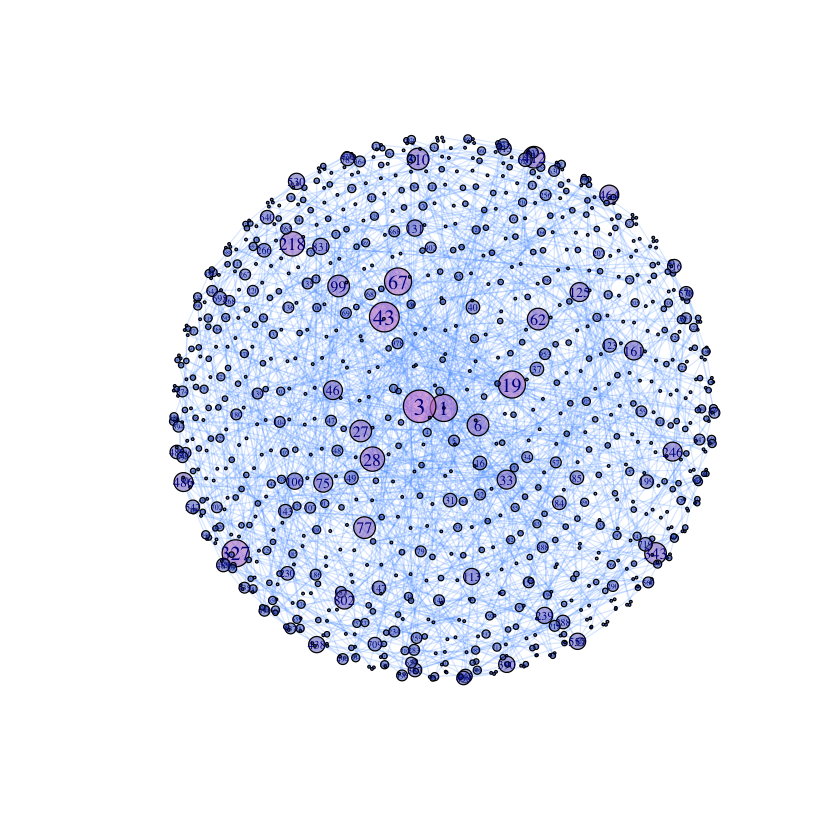

In [17]:
g <- sample_pa_age(n = 1000, pa.exp = 1, aging.exp = -1, m = 1, aging.bin = 300, directed = FALSE,
                   zero.deg.appeal = 1, zero.age.appeal = 0, deg.coef = 1, age.coef = 1)
layout <- layout.sphere(g)
plot(g, vertex.size=degree(g), vertex.color = rgb(red = degree(g)/20 + 0.2, green = 0.5, blue = 0.8, alpha = 0.6),
     vertex.label.cex=degree(g)/10, layout = layout, edge.color = rgb(0.3,0.6,1,0.2))

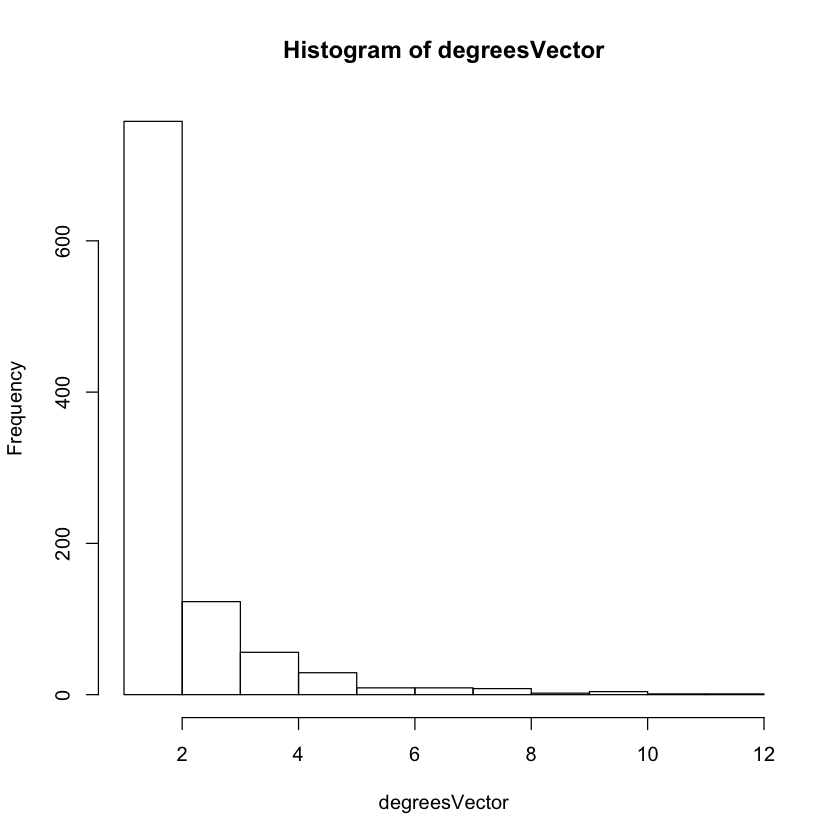

In [18]:
# plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
degreesVector <- degree(g)
hist(degreesVector)

In [19]:
fit1 <- fit_power_law(degreesVector, xmin=1, implementation = "plfit")
print(fit1)

$continuous
[1] FALSE

$alpha
[1] 2.093683

$xmin
[1] 1

$logLik
[1] -1483.374

$KS.stat
[1] 0.1209453

$KS.p
[1] 3.940079e-13



In [20]:
fit2 <- fit_power_law(degreesVector, 1, implementation="R.mle")
print(fit2)


Call:
stats4::mle(minuslogl = mlogl, start = list(alpha = start))

Coefficients:
   alpha 
2.093859 


# 1.3(b)

[1] 0.9355166


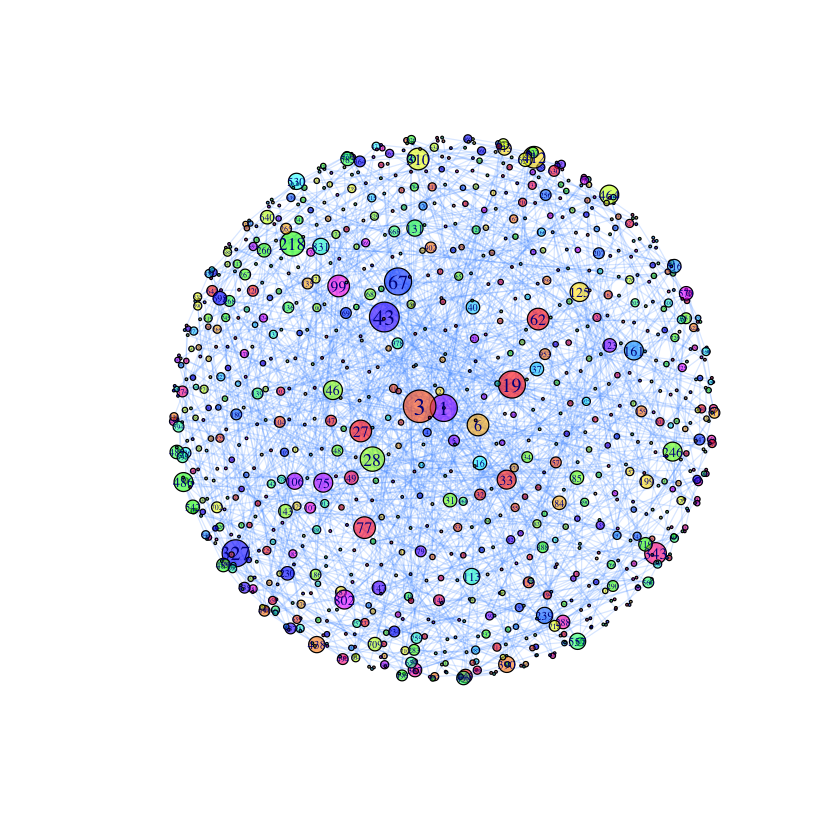

In [21]:
fg <- fastgreedy.community(g)
# print(fg)
print(modularity(fg))
V(g)$sg=fg$membership
layout <- layout.sphere(g)
plot(g, vertex.size=degree(g), vertex.color = rainbow(max(V(g)$sg),alpha=0.6)[V(g)$sg], vertex.label.cex=degree(g)/10,
     edge.color = rgb(0.3,0.6,1,0.2), layout = layout)